# Prédiction du prix des voitures à travers une application Web
À partir des données concernant les voitures, faisons un modèle de Machine Learning permettant de prédire le prix des voitures et déployer ce modèle.

## 1. Lecture de données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("car_price_prediction.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
df.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

## 2. Analyse Exploratoire et Visualisation des données

In [4]:
df['Price'].unique()

array([13328, 16621,  8467, ..., 56814, 63886, 22075])

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns



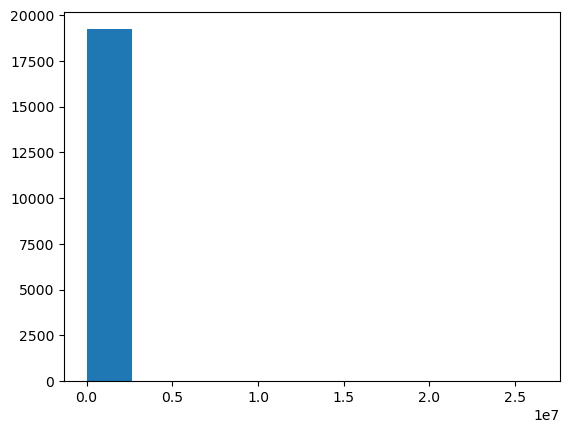

In [6]:
plt.hist(df["Price"])
# Afficher le graphique
plt.show()

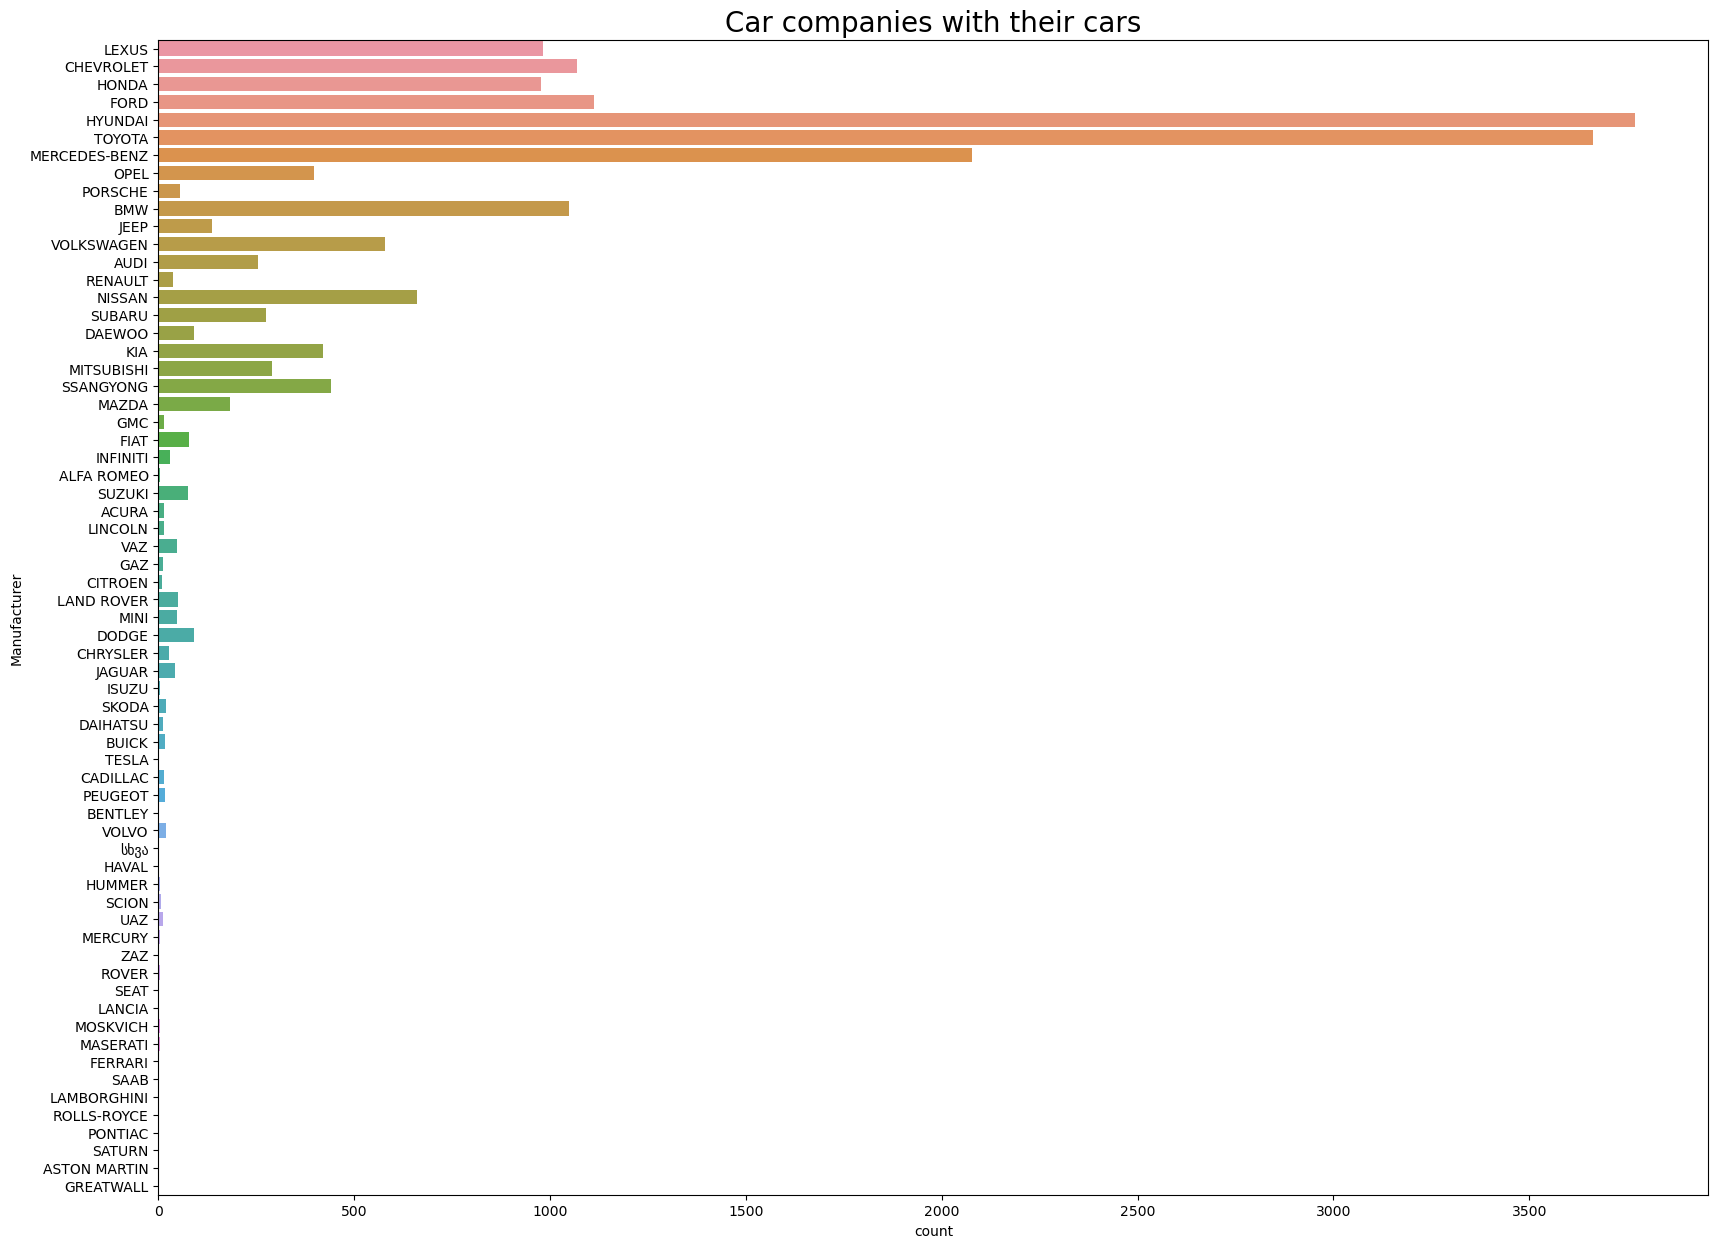

In [7]:
plt.figure(figsize = (20, 15))
sns.countplot(y = df['Manufacturer'])
plt.title("Car companies with their cars", fontsize = 20)
plt.show()

In [8]:
# on convertit les features en une liste de columns
columns = df.columns.tolist()
columns

['ID',
 'Price',
 'Levy',
 'Manufacturer',
 'Model',
 'Prod. year',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Cylinders',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color',
 'Airbags']

In [9]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,ID,Price,Prod. year,Cylinders,Airbags,Levy_-,Levy_1011,Levy_1016,Levy_1017,Levy_1018,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,45654403,13328,2010,6.0,12,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44731507,16621,2011,6.0,8,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,45774419,8467,2006,4.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45769185,3607,2011,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,45809263,11726,2014,4.0,4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

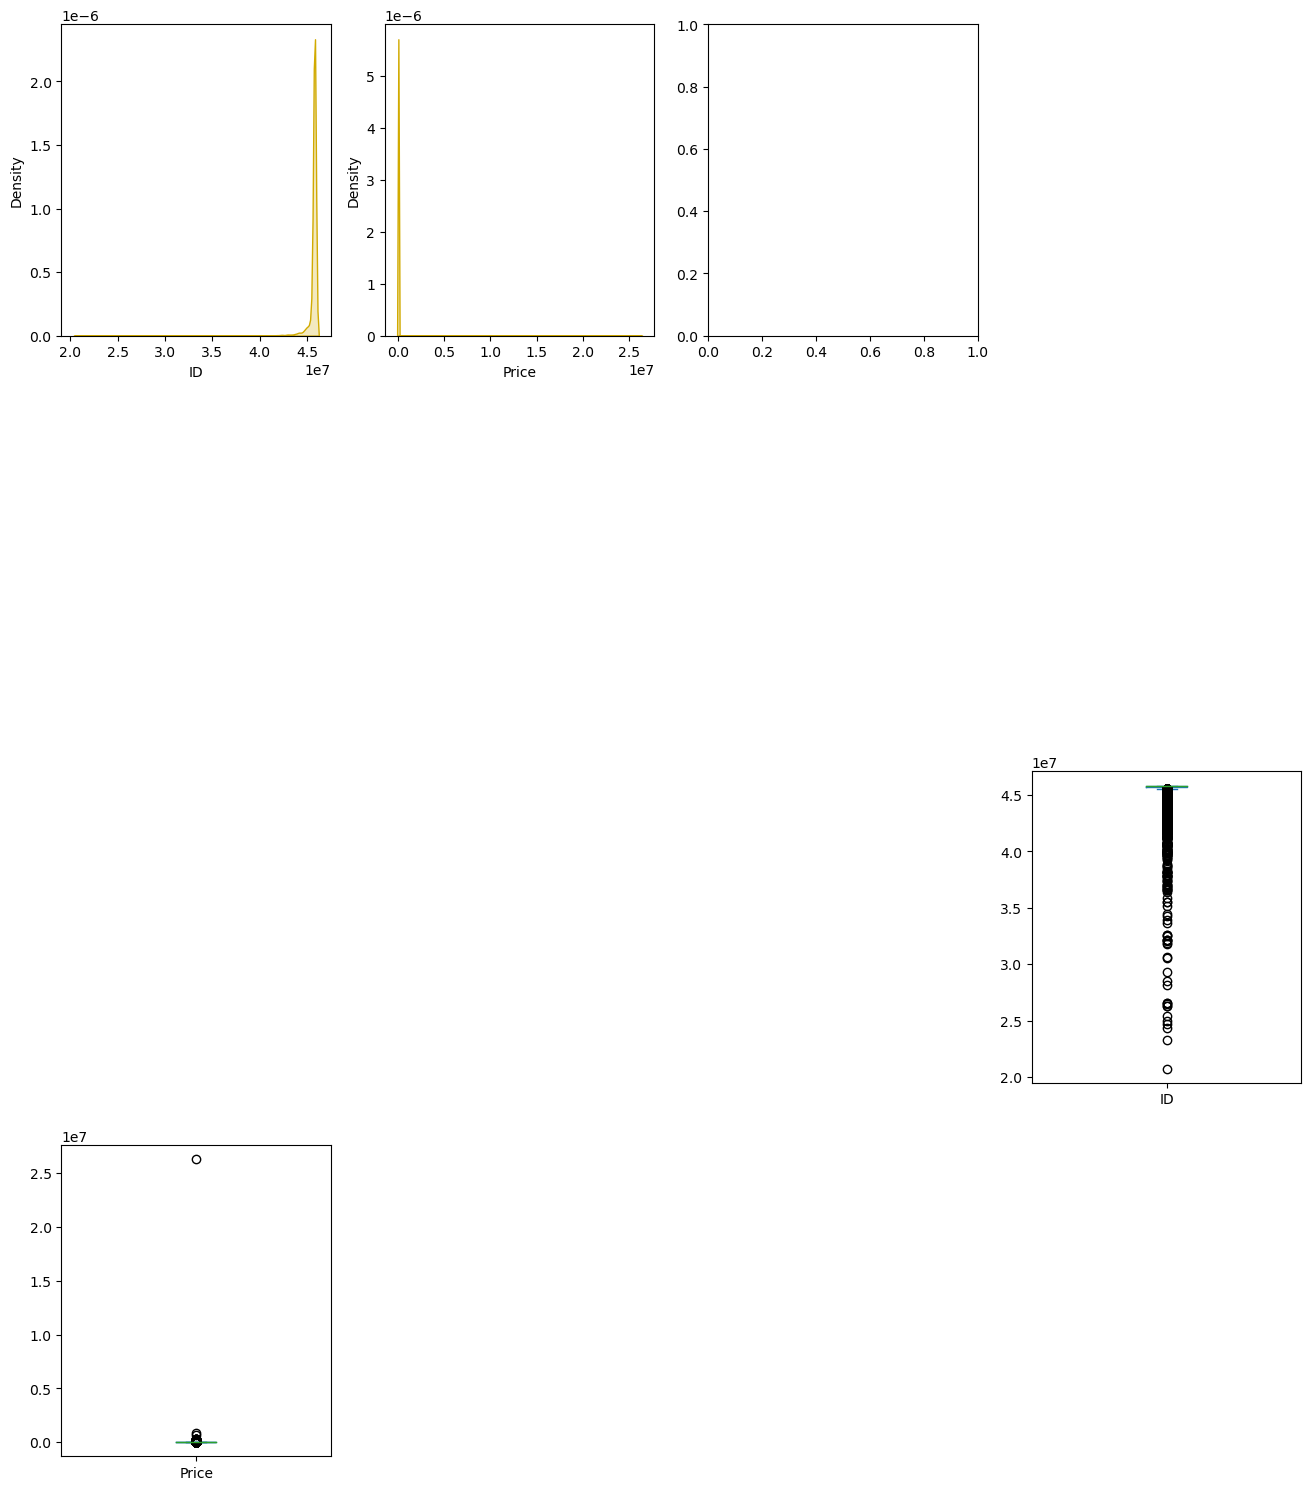

In [10]:
plt.figure(figsize=(16,38))

for i, col in enumerate(columns, 1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col], color = '#d1aa00', fill = True, warn_singular=False)
    plt.subplot(8,4,i+11)
    df[col].plot.box()
plt.tight_layout()
plt.show()


In [ ]:
df = pd.get_dummies(df)
df.head()

Supprimons la colonne ID

In [ ]:
df.drop('ID', inplace=True, axis=1)

In [ ]:
df.head()

In [ ]:
df.describe(include = 'all')

De ce fait ,nous pouvons le vérifier dans la liste de colonnes ci-dessous.

In [ ]:
columns = df.columns.tolist()
columns

Sur le rendu ci-dessous, on voit qu'il ya des  outliers. Examinons de près grâce à la rélation entre Skewness et Kurtosis.

In [ ]:
pd.DataFrame(data=[df[columns].skew(),df[columns].kurtosis()],index=['skewness','kurtosis'])

In [ ]:
from scipy.stats import zscore
for i in columns:
    y_outliers = df[abs(zscore(df[i])) >= 3 ]
    print('Le nombre des outliers de ',i,'est ',len(y_outliers))
    y_outliers
    


Maintenant, mettons le prix suivant une classe ( __Moins chèr,Moyen, Chèr et Très Chèr__).

In [ ]:
df['Price'].describe()

In [ ]:
print((1.855593e+04)+9278.965)

In [ ]:
def price_class(Price):
    if (Price >=1 and Price<=9278.965):
        return "Moins Cher"
    elif (Price > 9278.965 and Price<=1.855593e+04):
        return "Moyen"
    elif (Price >1.855593e+04  and Price<=27834.895):
        return "Cher"
    else:
        return "Tres Cher"

df['Classe'] = df['Price'].apply(price_class)
df.sample(frac=1).head(10)

In [ ]:
df['Classe'].value_counts()

In [ ]:
import seaborn as sns
f = plt.figure(figsize=(14,12))
sns.set()
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## 3. Traitement des Valeurs abbérrantes

Vérifions si notre dataset ne comporte pas de  valeurs nulles


In [ ]:
df.isnull().sum()

In [ ]:
df.isna().sum()

In [ ]:
df.duplicated()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.head()

Supprimons certaines colonnes .

In [ ]:
df.drop('Doors', inplace=True, axis=1)
df.drop('Wheel', inplace=True, axis=1)
df.drop('Leather interior', inplace=True, axis=1)
df.drop('Levy', inplace=True, axis=1)

## 5. Entrainement du Modèle

In [ ]:
X = df.iloc[:, 1:12].values
Y = df.iloc[:, 12].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### La matrice de confusion
La matrice de confusion est un outil de mesure de la performance des modèles de classification à 2 classes ou plus. 

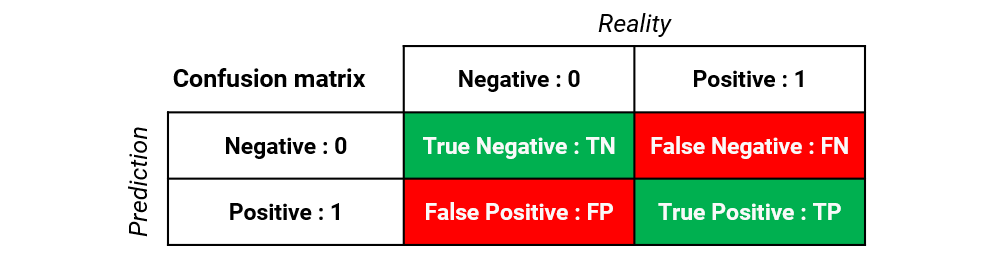

Importons les bibiliothèques nécéssaires

In [ ]:
import sklearn.linear_model as sk
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

## Regression Linéaire.

In [ ]:
classifier_LR = LinearRegression()
classifier_LR.fit(X_train, Y_train)

In [ ]:
print("Le score est  :")
classifier_LR.score(X_test, Y_test)

Le score est très faible,déterminons l'erreur.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)
print("L'erreur  est :")
mean_squared_error(predictions, Y_test)

### 5.1 Regression Logistique.

In [ ]:

classifier_LR = LogisticRegression(random_state = 0)
classifier_LR.fit(X_train, Y_train)


In [ ]:
print("Le score est  :")
classifier_LR.score(X_test, Y_test)

In [ ]:
Y_pred = classifier_LR.predict(X_test)

Déterminons la valeur de l'erreur.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train, Y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)
print("L'erreur est :")
mean_squared_error(predictions, Y_test)